In [6]:
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/

########################################
TCR = "local" #local;global
season = "Annual" #Annual; JJA; DJF
stat = "median" #median;STD
path = "SPECIFY_DATA_PATH" #SPECIFY_DATA_PATH
########################################


"""
ANNUAL
"""
defor_local = np.asarray(Dataset(f"{path}/full_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_local = np.asarray(Dataset(f"{path}/full_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])

defor_dT = np.asarray(Dataset(f"{path}/dT_defor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])
refor_dT = np.asarray(Dataset(f"{path}/dT_refor_{season}_TCR_{TCR}_{stat}.nc","r")["data"][:])

defor_dC = np.asarray(Dataset(f"{path}/dC_defor_{season}_TCR_X_{stat}.nc","r")["data"][:])
refor_dC = np.asarray(Dataset(f"{path}/dC_refor_{season}_TCR_X_{stat}.nc","r")["data"][:])



<function matplotlib.pyplot.show(*args, **kw)>

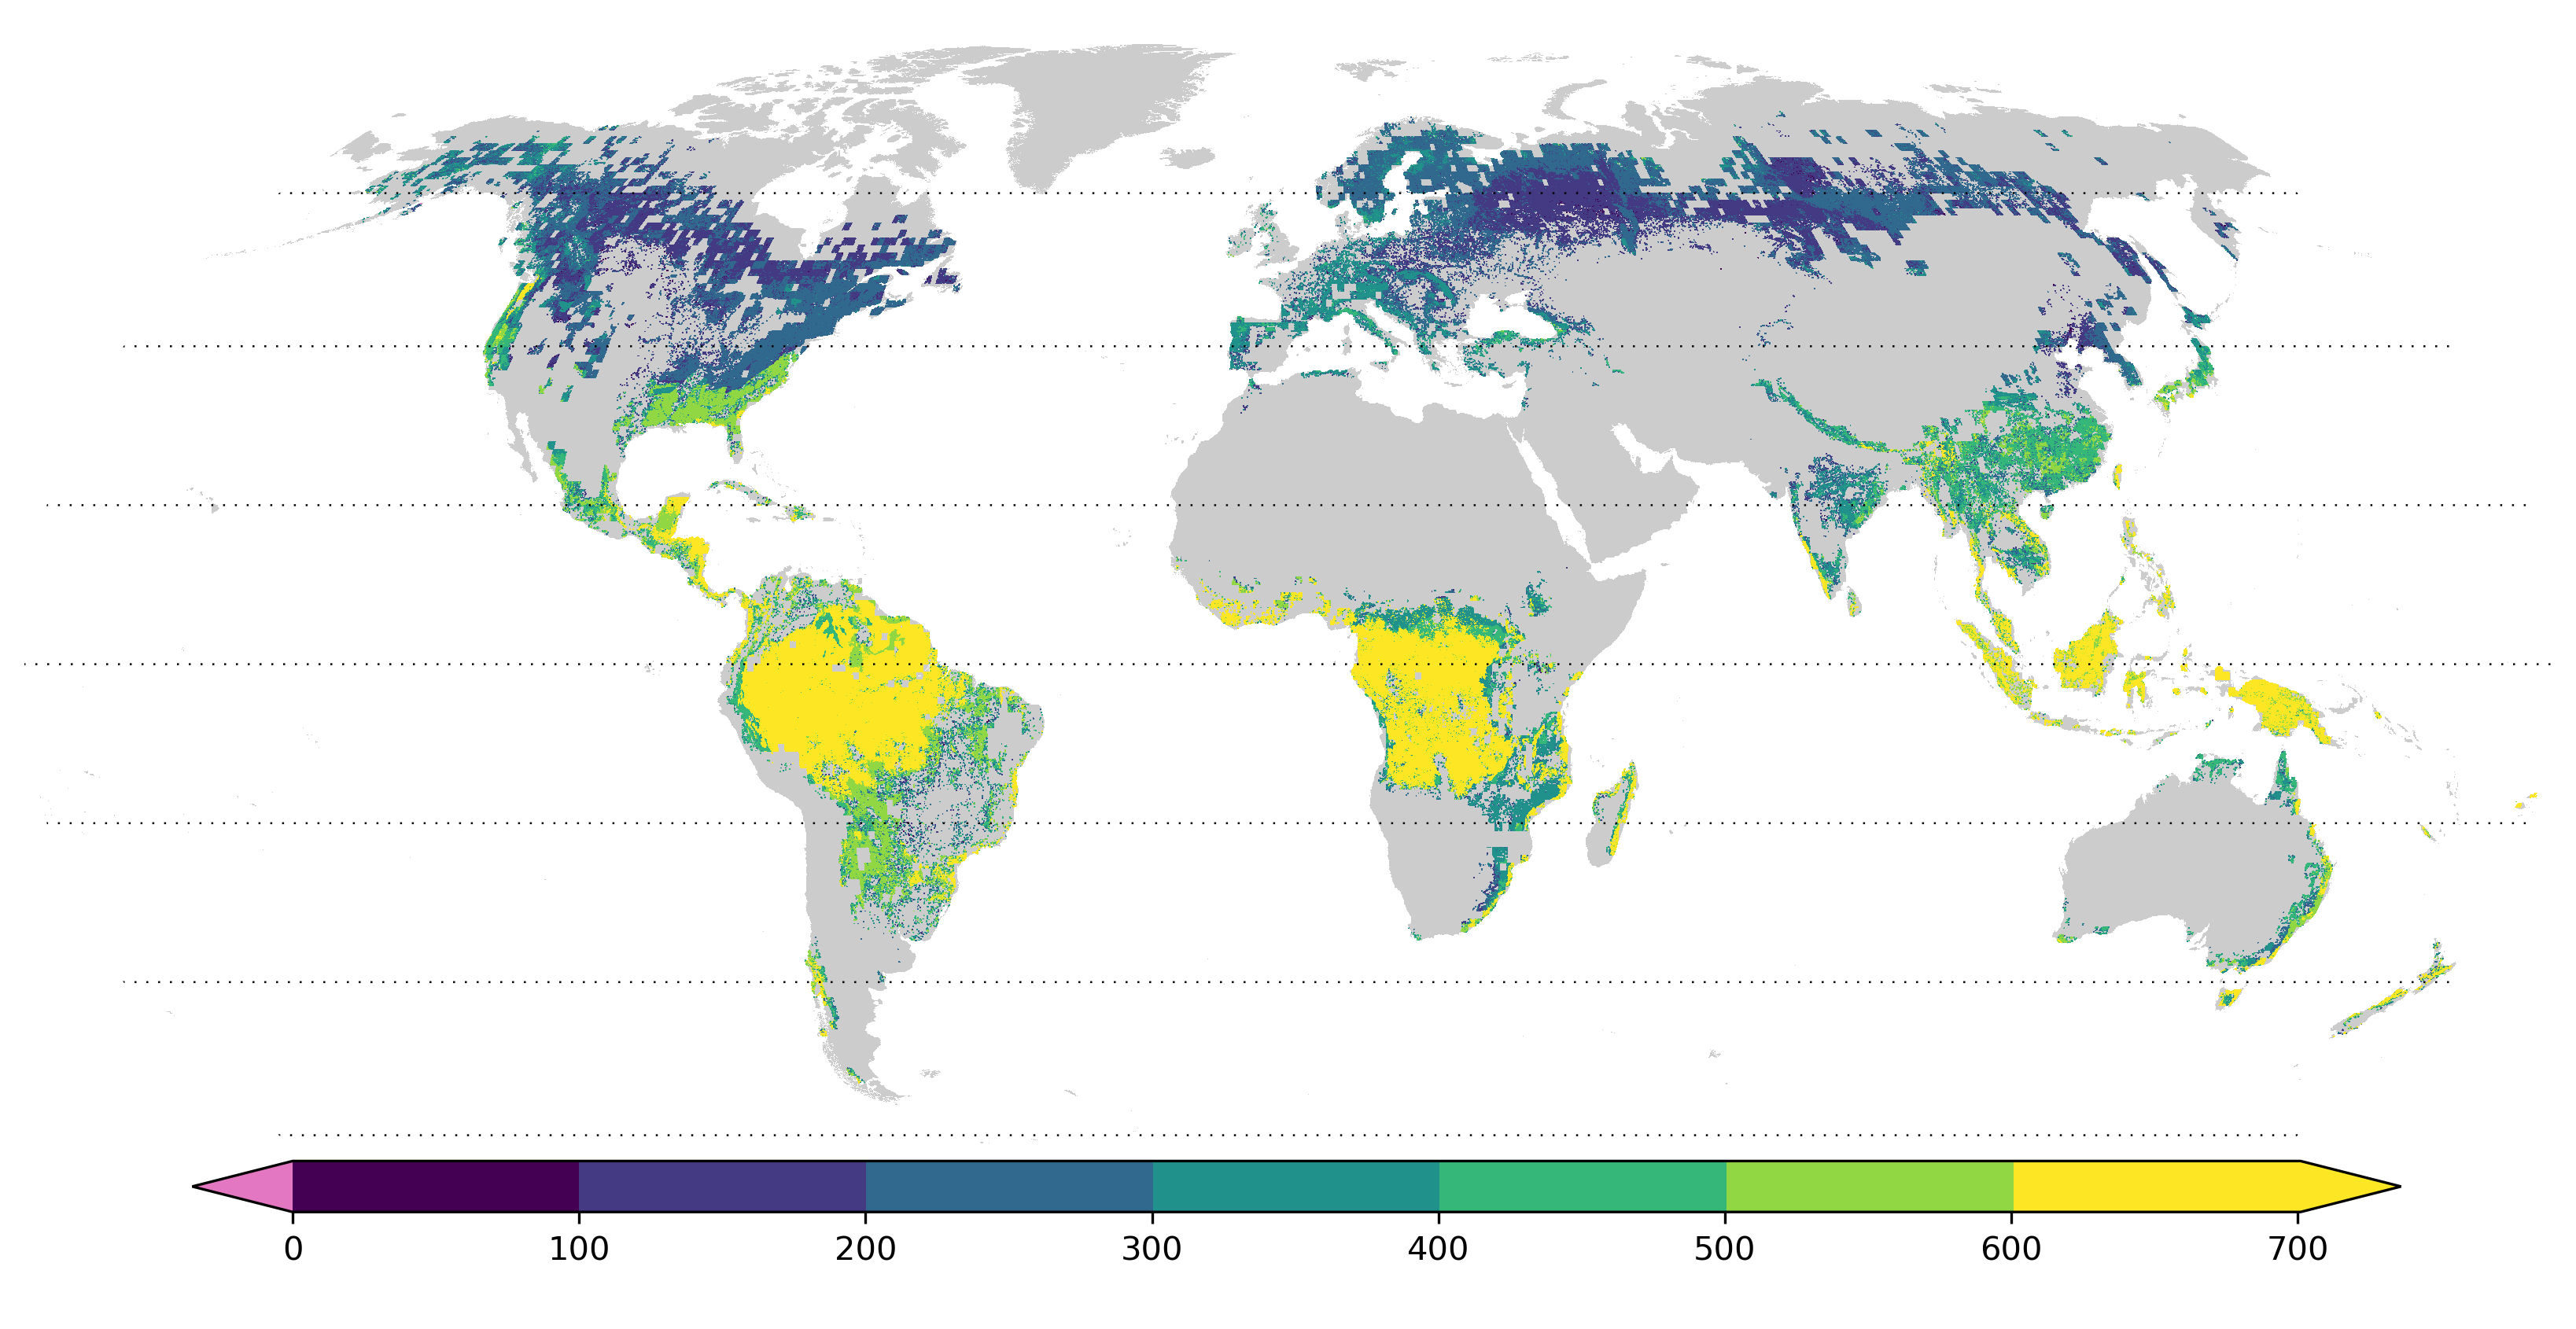

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl


fig = plt.figure(figsize=(14.4,7.2), dpi=300)
ax = plt.gca()

m = Basemap(projection='robin',lon_0=0,resolution='l',area_thresh=1000)

m.drawmapboundary(color='w',linewidth=0.1)
m.drawlsmask(land_color='0.8',ocean_color='w',resolution='h',lakes=False)

parallels = np.arange(-60,61,20.)
m.drawparallels(parallels,color='0.0',linewidth=0.6,dashes=[1,5])


lat_large = np.arange(-90,90,180/np.size(defor_local,0))
lon_large = np.arange(-180,180,360/np.size(defor_local,1))

lon2d, lat2d = np.meshgrid(lon_large, lat_large)
x, y = m(lon2d, lat2d)


cmap=plt.get_cmap('viridis',7)
cmap.set_under(color='tab:pink') 

m.pcolormesh(x, y, defor_local,rasterized=True, cmap=cmap,vmin=-0.001,vmax=700+1)

#m.pcolormesh(x, y, refor_local,rasterized=True, cmap=cmap,vmin=-0.001,vmax=700+1)



# Draw color legend.
ax_legend = fig.add_axes([0.19, 0.18, 0.65, 0.03],facecolor='w', zorder=2)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1200 * 1800, facecolor='w', edgecolor='w', zorder=3)



cbar = plt.colorbar(cax=ax_legend, orientation='horizontal',extend='both',shrink=0.8,aspect=40,ticks=np.arange(0,700+1,700/7))

plt.show

before pcolormesh
after pcolormesh


<function matplotlib.pyplot.show(*args, **kw)>

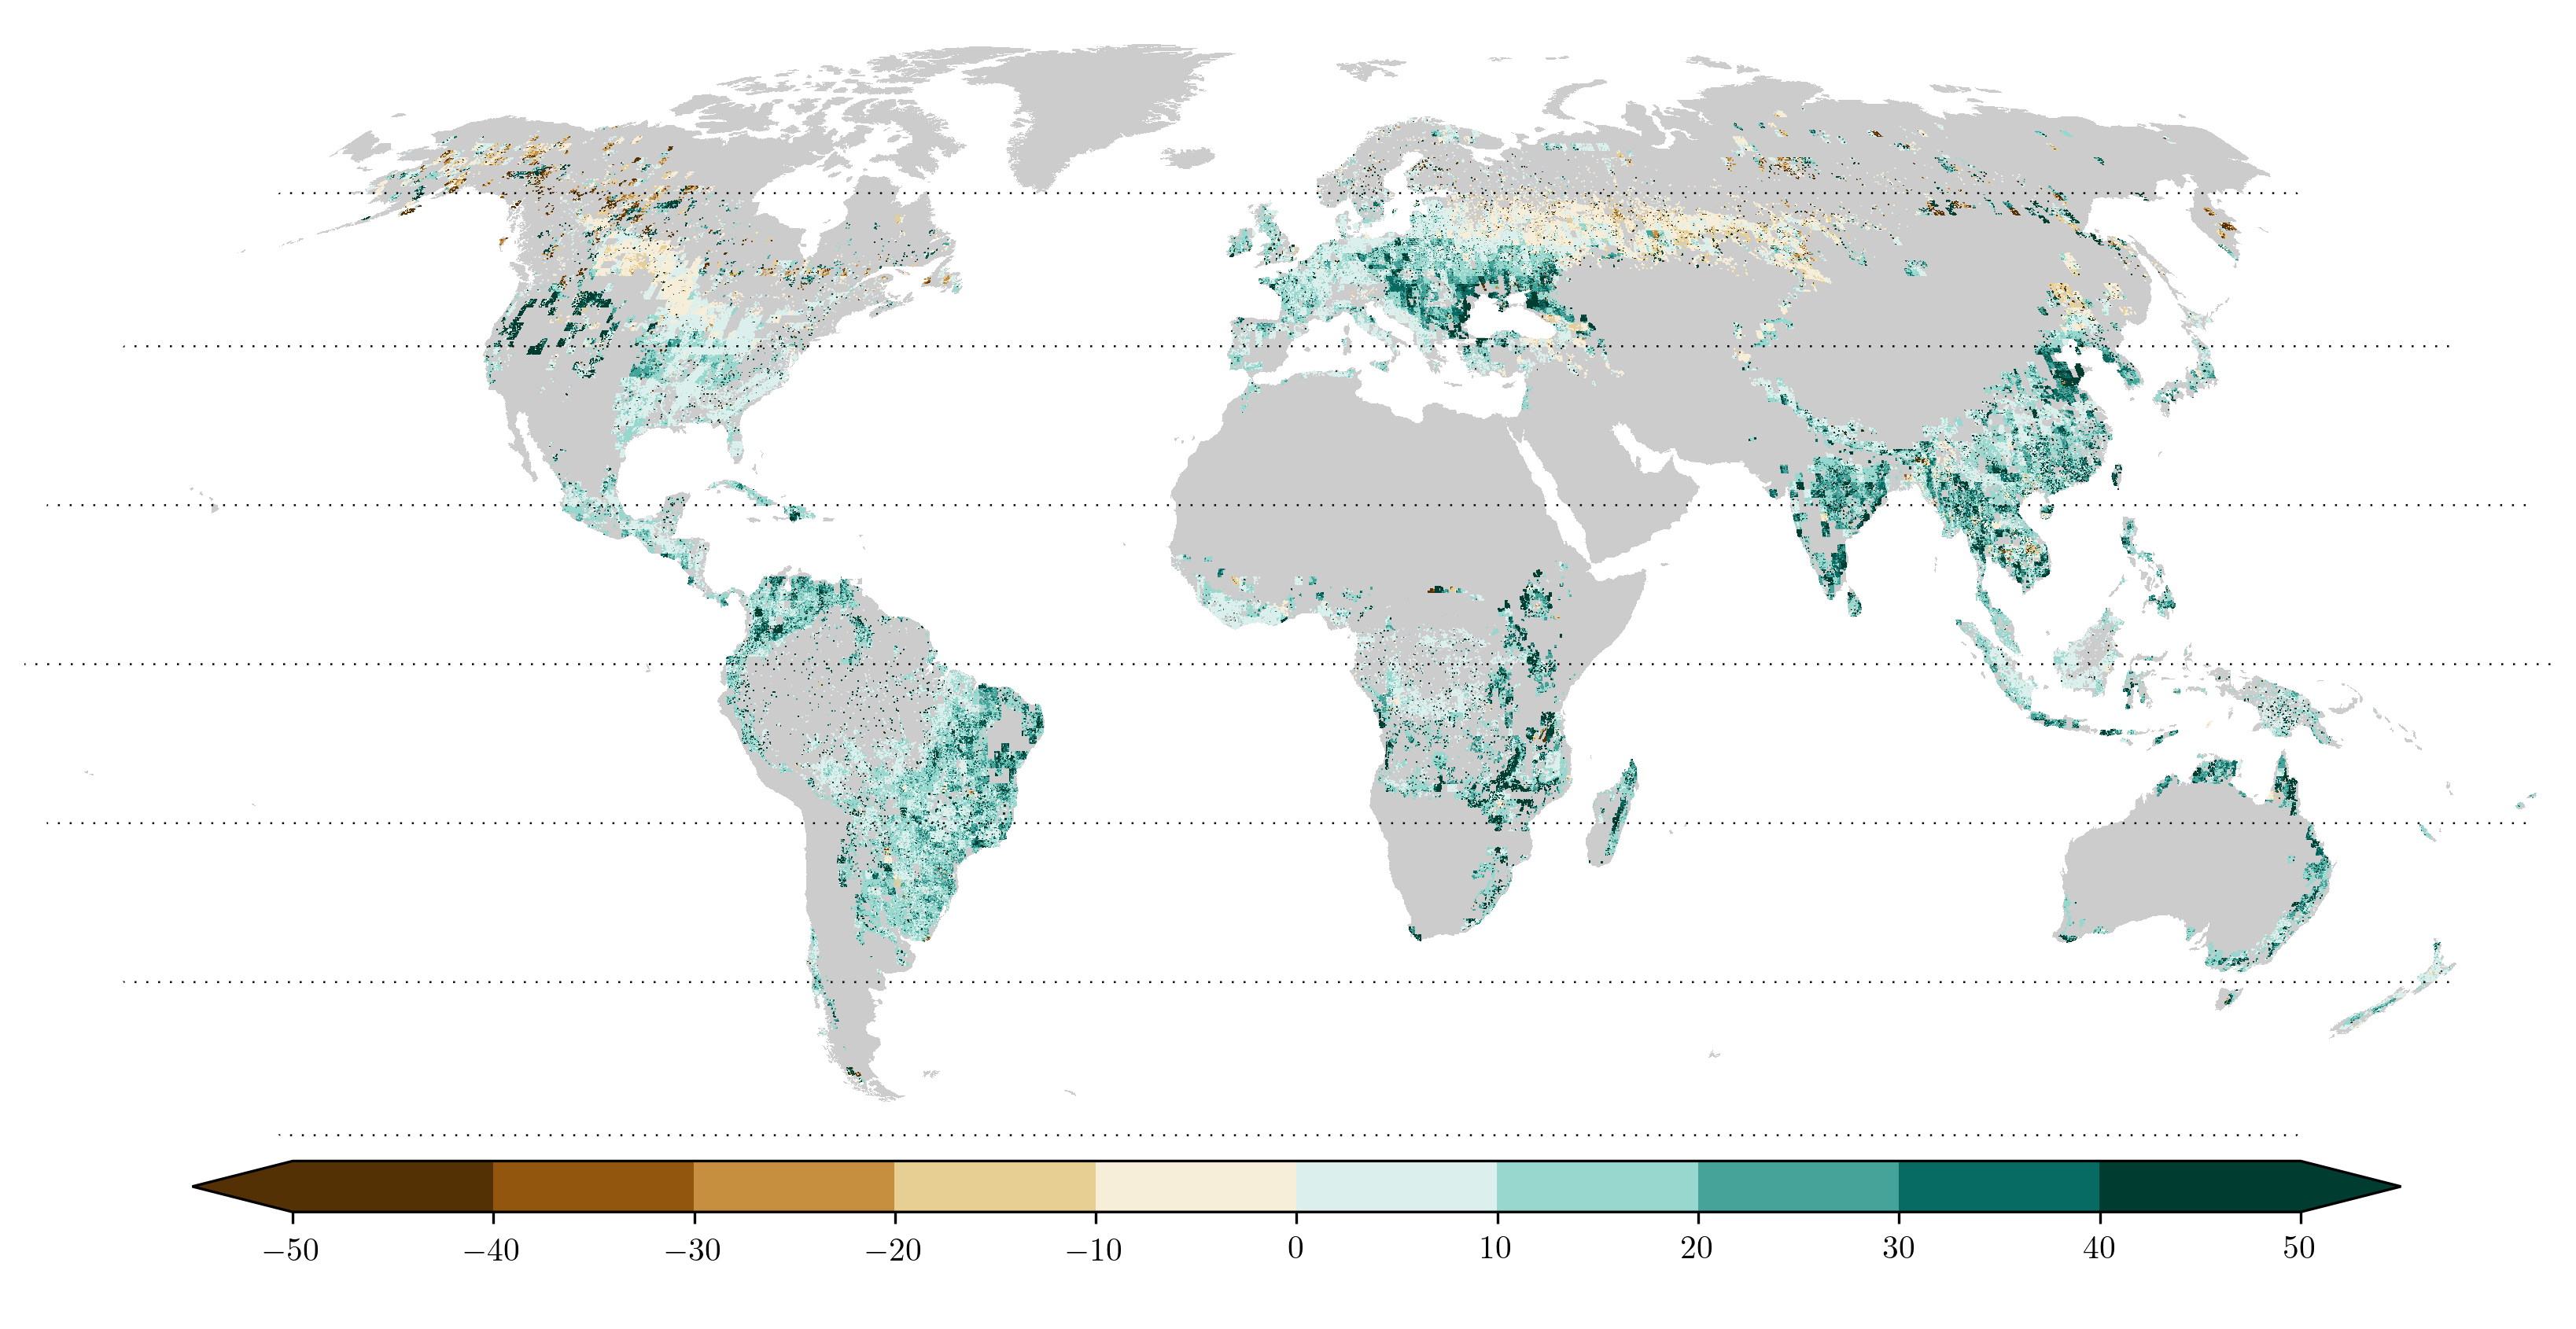

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl



defor_difference = 100*defor_dT/defor_dC
refor_difference = 100*refor_dT/refor_dC





#let Latex render the text
nice_fonts = {
        # Use LaTex to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

mpl.rcParams.update(nice_fonts)




      
fig = plt.figure(figsize=(14.4,7.2), dpi=300)
ax = plt.gca()

m = Basemap(projection='robin',lon_0=0,resolution='l',area_thresh=1000)

m.drawmapboundary(color='w',linewidth=0.1)
m.drawlsmask(land_color='0.8',ocean_color='w',resolution='l',lakes=False)


parallels = np.arange(-60,61,20.)
m.drawparallels(parallels,color='0.0',linewidth=0.6,dashes=[1,5])


lat_large = np.arange(-90,90,180/np.size(defor_local,0))
lon_large = np.arange(-180,180,360/np.size(defor_local,1))


lon2d, lat2d = np.meshgrid(lon_large, lat_large)
x, y = m(lon2d, lat2d)



cmap=plt.get_cmap('BrBG',10)


print('before pcolormesh')
#m.pcolormesh(x, y, defor_difference,rasterized=True, cmap=cmap,vmin=-50,vmax=50)

m.pcolormesh(x, y, refor_difference,rasterized=True, cmap=cmap,vmin=-50,vmax=50)
print('after pcolormesh')


# Draw color legend.
ax_legend = fig.add_axes([0.19, 0.18, 0.65, 0.03],facecolor='w', zorder=2)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1200 * 1800, facecolor='w', edgecolor='w', zorder=3)



cbar = plt.colorbar(cax=ax_legend, orientation='horizontal',extend='both',shrink=0.8,aspect=40,ticks=np.arange(-50,50.1,100/10))


plt.show